In [1]:
from IPython.display import Audio
import librosa

import tensorflow.compat.v1 as tf
import tensorflow_io as tfio

import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf)
from matplotlib import cm

import torchaudio, torch

2024-05-17 08:29:10.466331: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 08:29:11.068665: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/cx0618/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/home/cx0618/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/home/cx0618/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl8OkStatusEv']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/home/cx0618/.local/lib/py

### Load the dataset

In [2]:
## Building the data tensor set
## Using 3400 audios for each classes
## for counting number of data in the dataset through file system;
## Reference method: image_count = len(list(DATASETPATH.glob('./*.wav')))
data_tensor_yes = []
data_tensor_no = []
data_tensor_test_yes = []
data_tensor_test_no = []
for i in range(3400):
    filename = './Dataset/yes/yes' + str(i+1) + '.wav'
    data_audio_tensor, data_rate = torchaudio.load(filename)
    data_tensor_yes.append(np.array(data_audio_tensor[0].tolist()))
for i in range(3400):
    filename = './Dataset/no/no' + str(i+1) + '.wav'
    data_audio_tensor, data_rate = torchaudio.load(filename)
    data_tensor_no.append(np.array(data_audio_tensor[0].tolist()))
## load test dataset
for i in range(490):
    filename = './test_set/yes/yes' + str(i+1) + '.wav'
    data_audio_tensor, data_rate = torchaudio.load(filename)
    data_tensor_test_yes.append(np.array(data_audio_tensor[0].tolist()))
for i in range(490):
    filename = './test_set/no/no' + str(i+1) + '.wav'
    data_audio_tensor, data_rate = torchaudio.load(filename)
    data_tensor_test_no.append(np.array(data_audio_tensor[0].tolist()))
print(len(data_tensor_yes[0]))

16000


In [3]:
## Construct the mfcc set
mfcc_set_yes = []
mfcc_set_no = []

mfcc_test_set_yes = []
mfcc_test_set_no = []

mfcc_train_labels = []
mfcc_test_labels = []
for i in data_tensor_yes:
    mfcc_audio = librosa.power_to_db(librosa.feature.melspectrogram(y=np.float32(np.array(i)),
                                                               sr=16000,
                                                               n_fft=2048,
                                                               hop_length=512,
                                                               n_mels=128), ref=np.max)
    mfcc_set_yes.append(mfcc_audio)
    mfcc_train_labels.append(1)
    
for i in data_tensor_no:
    mfcc_audio = librosa.power_to_db(librosa.feature.melspectrogram(y=np.float32(np.array(i)),
                                                               sr=16000,
                                                               n_fft=2048,
                                                               hop_length=512,
                                                               n_mels=128), ref=np.max)
    mfcc_set_no.append(mfcc_audio)
    mfcc_train_labels.append(0)


## load test mfccs
for i in data_tensor_test_yes:
    mfcc_audio = librosa.power_to_db(librosa.feature.melspectrogram(y=np.float32(np.array(i)),
                                                               sr=16000,
                                                               n_fft=2048,
                                                               hop_length=512,
                                                               n_mels=128), ref=np.max)
    mfcc_test_set_yes.append(mfcc_audio)
    mfcc_test_labels.append(1)

for i in data_tensor_test_no:
    mfcc_audio = librosa.power_to_db(librosa.feature.melspectrogram(y=np.float32(np.array(i)),
                                                               sr=16000,
                                                               n_fft=2048,
                                                               hop_length=512,
                                                               n_mels=128), ref=np.max)
    mfcc_test_set_no.append(mfcc_audio)
    mfcc_test_labels.append(0)

In [10]:
train_ds = []
test_ds = []
print(mfcc_set_yes[0].shape)

## resize
for i in mfcc_set_yes:
    resized = np.resize(i, (128,32))
    resized = resized.flatten()
    train_ds.append(resized)
for i in mfcc_set_no:
    resized = np.resize(i, (128,32))
    resized = resized.flatten()
    train_ds.append(resized)

for i in mfcc_test_set_yes:
    resized = np.resize(i, (128,32))
    resized = resized.flatten()
    test_ds.append(resized)
for i in mfcc_test_set_no:
    resized = np.resize(i, (128,32))
    resized = resized.flatten()
    test_ds.append(resized)

train_ds = np.array(train_ds)
test_ds = np.array(test_ds)

train_ds = train_ds.astype('float32')
##train_ds = np.reshape(train_ds, (len(train_ds), 128, 32, 1))

test_ds = test_ds.astype('float32')
##test_ds = np.reshape(test_ds, (len(test_ds), 128, 32, 1))
print(train_ds.shape)

y_train = np.array(mfcc_train_labels)
y_test = np.array(mfcc_test_labels)
print(y_test[0])
print(test_ds[0].tolist())

(128, 32)
(6800, 4096)
1
[-80.0, -80.0, -73.94276428222656, -42.13337707519531, -35.387428283691406, -31.029380798339844, -28.29726219177246, -26.768098831176758, -29.3536376953125, -40.54862594604492, -47.300209045410156, -52.67438507080078, -56.960548400878906, -66.74159240722656, -70.74909973144531, -65.567626953125, -63.24832534790039, -64.72746276855469, -64.90931701660156, -65.6297378540039, -67.98385620117188, -65.2867660522461, -67.25363159179688, -71.07553100585938, -68.70158386230469, -71.04463958740234, -68.43637084960938, -56.377750396728516, -43.740753173828125, -42.483604431152344, -48.07990646362305, -54.021888732910156, -80.0, -80.0, -73.30540466308594, -44.60560607910156, -39.567466735839844, -34.533077239990234, -32.735107421875, -33.9114990234375, -37.8328971862793, -38.420310974121094, -39.189361572265625, -44.352081298828125, -54.24753189086914, -63.899627685546875, -70.55210876464844, -66.78977966308594, -62.65095520019531, -57.89472198486328, -54.35967254638672, 

# Building the model

In [11]:
num_classes = 2

model = tf.keras.Sequential([
    tf.keras.layers.Reshape((128, 32, 1)),
##    tf.keras.layers.DepthwiseConv2D(3, activation='relu'),
##    tf.keras.layers.MaxPooling2D(),
##    tf.keras.layers.DepthwiseConv2D(3, activation='relu'),
##    tf.keras.layers.MaxPooling2D(),
##    tf.keras.layers.DepthwiseConv2D(3, activation='relu'),
##    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(10, 3, 3, activation='relu'),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Flatten(),
##    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])
model.summary()
## Complie the model
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
## Train the model

EPOCHS = 100
his = model.fit(
    train_ds,
    y_train,
    validation_data=(test_ds, y_test),
    epochs=EPOCHS,
)

Epoch 1/100


2024-05-17 08:33:53.093950: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 111411200 exceeds 10% of free system memory.


213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5023 - loss: 19.4386 - val_accuracy: 0.8327 - val_loss: 1.2261
Epoch 2/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6105 - loss: 10.8434 - val_accuracy: 0.8592 - val_loss: 1.1690
Epoch 3/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6466 - loss: 6.6297 - val_accuracy: 0.8582 - val_loss: 1.0336
Epoch 4/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6978 - loss: 4.4640 - val_accuracy: 0.8735 - val_loss: 0.7119
Epoch 5/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 2.9567 - val_accuracy: 0.8724 - val_loss: 0.5476
Epoch 6/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7250 - loss: 2.0433 - val_accuracy: 0.8622 - val_loss: 0.4690
Epoch 7/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7248 - loss: 1.4319 - val_accuracy: 0.8582 - val_loss: 0.4424
Epoch 8/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7366 - loss: 1.0867 - val_accuracy: 0.84

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.9249 - loss: 0.2105

Test score/loss: 0.1701243370771408
Test accuracy: 0.9387755393981934
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


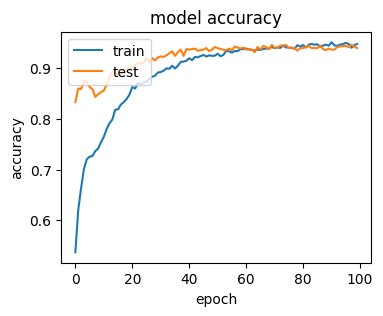

In [13]:
#Testing
score = model.evaluate(test_ds, y_test, batch_size=32)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(his.history.keys())

# summarize history for accuracy
#plt.plot(mo)
fig= plt.figure(figsize=(4,3))
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Export the model

In [14]:
import pathlib
export_dir = 'models/KWS'
model.export(export_dir)

INFO:tensorflow:Assets written to: models/KWS/assets


INFO:tensorflow:Assets written to: models/KWS/assets


Saved artifact at 'models/KWS'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4096), dtype=tf.float32, name='keras_tensor_6')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  136432995411648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136432995417104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136432994768448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136432994770912: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [29]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('models/KWS.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Restoring parameters from models/KWS/variables/variables


INFO:tensorflow:Restoring parameters from models/KWS/variables/variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default', 'serve'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default', 'serve'}


INFO:tensorflow:Restoring parameters from models/KWS/variables/variables


INFO:tensorflow:Restoring parameters from models/KWS/variables/variables


INFO:tensorflow:Restoring parameters from models/KWS/variables/variables


2024-05-17 14:06:21.873780: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 14:06:21.874141: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-05-17 14:06:21.874220: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-05-17 14:06:21.874452: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 14:06:21.874654: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2

INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default', 'serve'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default', 'serve'}


INFO:tensorflow:Restoring parameters from models/KWS/variables/variables


INFO:tensorflow:Restoring parameters from models/KWS/variables/variables
2024-05-17 14:06:21.990078: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 14:06:21.990295: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-05-17 14:06:21.990370: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-05-17 14:06:21.990613: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05

37940

### Post-Quantisation

In [30]:
def representative_dataset_gen(num_samples=100):
    for data in train_ds[:num_samples]:
        yield [data.reshape(1, 128, 32, 1)]
##def representative_data_gen():
##    for input_value, _ in y_test.take(100):
##        yield [input_value]
converter_op = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter_op.optimizations = [tf.lite.Optimize.DEFAULT]
converter_op.representative_dataset = representative_dataset_gen
converter_op.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter_op.inference_input_type = tf.int8
converter_op.inference_output_type = tf.int8

tflite_model_file = pathlib.Path('models/KWS_op.tflite')
tflite_model_file.write_bytes(converter_op.convert())

INFO:tensorflow:Restoring parameters from models/KWS/variables/variables


INFO:tensorflow:Restoring parameters from models/KWS/variables/variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', 'serve', '__saved_model_init_op'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', 'serve', '__saved_model_init_op'}


INFO:tensorflow:Restoring parameters from models/KWS/variables/variables


INFO:tensorflow:Restoring parameters from models/KWS/variables/variables


INFO:tensorflow:Restoring parameters from models/KWS/variables/variables


2024-05-17 14:06:26.063238: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 14:06:26.063458: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-05-17 14:06:26.063532: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-05-17 14:06:26.063754: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 14:06:26.063913: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2

INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default', 'serve'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default', 'serve'}


INFO:tensorflow:Restoring parameters from models/KWS/variables/variables


INFO:tensorflow:Restoring parameters from models/KWS/variables/variables
2024-05-17 14:06:26.171601: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 14:06:26.171821: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-05-17 14:06:26.171899: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-05-17 14:06:26.172158: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05

13112

## Test the accuracy of lite model

In [38]:
## load the dataset again
test_ds = []

for i in mfcc_test_set_yes:
    resized = np.resize(i, (128,32))
    resized = resized.flatten()
    test_ds.append(resized)
for i in mfcc_test_set_no:
    resized = np.resize(i, (128,32))
    resized = resized.flatten()
    test_ds.append(resized)

test_ds = np.array(test_ds)
test_ds = test_ds.astype('float32')

In [39]:
TFLITE_MODEL_FILE = 'models/KWS_op.tflite'
interpreter = tf.lite.Interpreter(model_path = TFLITE_MODEL_FILE)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

test_ds = np.expand_dims(test_ds, axis=1).astype(np.float32)

input_scale, input_zero_point = input_details['quantization']
test_ds = test_ds / input_scale + input_zero_point
test_ds = test_ds.astype(input_details['dtype'])
print(input_scale)
print(input_zero_point)
print(test_ds[3].tolist())

correct_predictions = 0
for i in range(len(test_ds)):
    interpreter.set_tensor(input_details["index"], test_ds[i])
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]
    top_prediction = output.argmax()
    correct_predictions += (top_prediction == y_test[i])
    print(str(i)+': '+str(y_test[i])+' '+str(output)+' '+str(top_prediction))

print('model accuracy is %f%% (Number of test samples=%d)' % (
    (correct_predictions * 100) / len(test_ds), len(test_ds)))


0.3137255012989044
127
[[11, 1, -6, -5, -1, 25, 33, 15, -8, -16, -11, 6, 10, 5, 8, 6, -7, -2, 4, 7, 5, 2, 1, 3, -2, 1, 4, 16, 16, 9, 10, 13, 21, 19, 6, -3, 3, 18, 24, 16, 24, 25, 17, 3, 6, 4, 12, 12, 15, 15, 10, 16, 2, -9, 0, 1, 8, 8, 5, 0, -3, -8, 0, -1, 2, 18, 21, -4, 22, 36, 21, 13, 21, 41, 61, 65, 50, 21, 17, 14, 6, 10, -3, 1, 9, 8, -2, -8, 13, 7, -10, -7, 3, 0, 5, -5, 6, 27, 42, 36, 37, 67, 74, 76, 78, 73, 73, 67, 47, 34, 22, 6, -1, -13, -9, 0, 11, 8, -21, -7, 11, 18, -1, 0, 7, 12, 0, -2, 1, 40, 46, 28, 36, 65, 77, 81, 81, 65, 46, 43, 21, -5, -8, -3, -13, -21, -20, -14, -1, -6, -9, 1, 0, 2, 2, 0, -1, 6, 0, 4, 2, 32, 38, 19, 14, 36, 50, 57, 43, 28, 52, 54, 30, -2, -4, -10, -2, -5, -9, 0, 3, -12, -3, 8, 1, 2, 12, 8, 1, -7, -2, -2, 1, 33, 39, 16, 3, 27, 44, 48, 39, 55, 74, 70, 50, 14, 6, -8, -5, 2, -4, 0, 3, 1, 9, 8, 6, 1, 4, 0, -7, -15, -2, 1, -2, 31, 55, 66, 81, 94, 92, 78, 75, 95, 83, 35, 26, -4, -15, -22, -18, -17, -13, -20, -15, 2, -1, -3, -1, -5, -8, -10, -22, -14, -11, -20, -3

In [33]:
import netron
netron.start(R'./models/KWS_op.tflite')

Serving './models/KWS_op.tflite' at http://localhost:8080


('localhost', 8080)

### Create binary file

In [34]:
MODEL_TFLITE = './models/KWS_op.tflite'
MODEL_TFLITE_MICRO = 'kws_yes_no.cc'
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}

In [35]:
!cat {MODEL_TFLITE_MICRO}

unsigned char g_model[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x9c, 0x00, 0x00, 0x00, 0x90, 0x23, 0x00, 0x00,
  0xa0, 0x23, 0x00, 0x00, 0x6c, 0x32, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x5c, 0x00, 0x00, 0x00,
  0x2c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0xb8, 0xff, 0xff, 0xff,
  0x16, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00,
  0x43, 0x4f, 0x4e, 0x56, 0x45, 0x52, 0x53, 0x49, 0x4f, 0x4e, 0x5f, 0x4d,
  0x45, 0x54, 0x41, 0x44, 0x41, 0x54, 0x41, 0x00, 0xdc, 0xff, 0xff, 0xff,
  0x15, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00,
  0x6d, 0x69, 0x6e, 0x5f, 0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f,
  0x76, 0x65, 0x72, 0x73, 0x69, 0x6f, 0x6e, 0x00, 0x08, 0x00, 0x0c, 0x00,
  0x08, 0x